In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import tiktoken

In [ ]:
df = pd.read_json("train.json", lines=True)
df

,summary,uid,id,transcript
0,AS AMENDED a bill for an ordinance amending th...,DenverCityCouncil_05012017_17-0161,0,Please refrain from profane or obscene speech....
1,AS AMENDED a bill for an ordinance amending th...,DenverCityCouncil_04102017_17-0161,1,An assessment has called out council bill 161 ...
2,AS AMENDED a bill for an ordinance amending th...,DenverCityCouncil_02272017_17-0161,2,I Please close the voting. Announce the result...
3,Recommendation to respectfully request City Co...,LongBeachCC_03072017_17-0161,3,"Motion passes. Hey, thank you very much. Now w..."
4,AS AMENDED a bill for an ordinance amending th...,DenverCityCouncil_03202017_17-0161,4,All right. Pursuant to Council Bill 3.7 consid...
...,...,...,...,...
5164,AN ORDINANCE imposing a tax on engaging in the...,SeattleCityCouncil_06052017_CB 118965,5164,Thank you. The bill passed and chair of the Se...
5165,Proclamation Declaring April 8 through April 1...,AlamedaCC_04022019_2019-6703,5165,Okay. Next is a proclamation declaring April e...
5166,Approves an agreement with Kaiser Foundation H...,DenverCityCouncil_01052015_14-1062,5166,I just pulled this one out. This one actually ...
5167,A bill for an Ordinance authorizing and approv...,DenverCityCouncil_06082015_15-0302,5167,The estimated taxable value following redevelo...


In [7]:
import re

df["meeting_id"] = df["uid"].apply(lambda x: re.sub(r"_[^_]+$", "", x))
df

,summary,uid,id,transcript,length,token_count,meeting_id
0,AS AMENDED a bill for an ordinance amending th...,DenverCityCouncil_05012017_17-0161,0,Please refrain from profane or obscene speech....,152314,33267,DenverCityCouncil_05012017
1,AS AMENDED a bill for an ordinance amending th...,DenverCityCouncil_04102017_17-0161,1,An assessment has called out council bill 161 ...,17461,3839,DenverCityCouncil_04102017
2,AS AMENDED a bill for an ordinance amending th...,DenverCityCouncil_02272017_17-0161,2,I Please close the voting. Announce the result...,3423,789,DenverCityCouncil_02272017
3,Recommendation to respectfully request City Co...,LongBeachCC_03072017_17-0161,3,"Motion passes. Hey, thank you very much. Now w...",5945,1184,LongBeachCC_03072017
4,AS AMENDED a bill for an ordinance amending th...,DenverCityCouncil_03202017_17-0161,4,All right. Pursuant to Council Bill 3.7 consid...,28910,6355,DenverCityCouncil_03202017
...,...,...,...,...,...,...,...
5164,AN ORDINANCE imposing a tax on engaging in the...,SeattleCityCouncil_06052017_CB 118965,5164,Thank you. The bill passed and chair of the Se...,37024,7889,SeattleCityCouncil_06052017
5165,Proclamation Declaring April 8 through April 1...,AlamedaCC_04022019_2019-6703,5165,Okay. Next is a proclamation declaring April e...,4185,921,AlamedaCC_04022019
5166,Approves an agreement with Kaiser Foundation H...,DenverCityCouncil_01052015_14-1062,5166,I just pulled this one out. This one actually ...,3785,815,DenverCityCouncil_01052015
5167,A bill for an Ordinance authorizing and approv...,DenverCityCouncil_06082015_15-0302,5167,The estimated taxable value following redevelo...,61274,12822,DenverCityCouncil_06082015


In [8]:
enc = tiktoken.encoding_for_model("gpt-4")

joined = (
    df.groupby("meeting_id")["transcript"]
    .apply(lambda x: " ".join(x))
    .reset_index()
)

joined["length"] = joined["transcript"].str.len()
joined["token_count"] = joined["transcript"].apply(lambda x: len(enc.encode(x)))
joined

,meeting_id,transcript,length,token_count
0,AlamedaCC_01022019,"However, we did not get approval at that time ...",136985,30104
1,AlamedaCC_01032017,And it was discussed that other cities have mo...,30277,6547
2,AlamedaCC_01052021,A loan of a maximum of six. Months of rent. Ag...,65766,14587
3,AlamedaCC_01062015,Warehouse Master Plan and Density Bonus Applic...,185707,40467
4,AlamedaCC_01072020,. The adoption resolution amending the General...,75693,16614
...,...,...,...,...
1198,SeattleCityCouncil_12132021,The Report of the Finance and Housing Committe...,99620,19896
1199,SeattleCityCouncil_12142015,The bill passes and the chair will sign it. Re...,86930,17782
1200,SeattleCityCouncil_12142020,The bill passes. Metro will sign it. Will the ...,96310,19010
1201,SeattleCityCouncil_12162016,approving confirming the plot of Fremont on th...,52878,10907


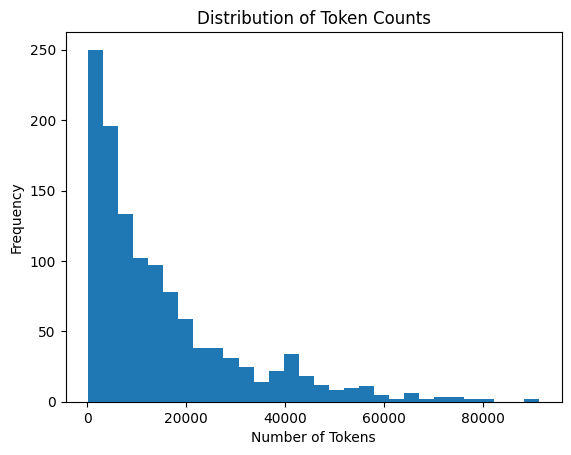

In [10]:
plt.hist(joined["token_count"], bins=30)
plt.title("Distribution of Token Counts")
plt.xlabel("Number of Tokens")
plt.ylabel("Frequency")
plt.show()